### Packages needs to install

In [35]:
!pip install scikit-image scikit-learn matplotlib

     |████████████████████████████████| 13.9 MB 754 kB/s            
     |████████████████████████████████| 3.4 MB 854 kB/s            
     |████████████████████████████████| 2.0 MB 1.5 MB/s            
     |████████████████████████████████| 210 kB 967 kB/s            
     |████████████████████████████████| 6.8 MB 941 kB/s            
You should consider upgrading via the '/home/berlin/Desktop/pose_3d/venv/bin/python -m pip install --upgrade pip' command.


### Import packages

In [24]:
import pandas as pd
import numpy as np
import os
import joblib

from sklearn.model_selection import train_test_split

from skimage.io import imread
from skimage.transform import resize

In [ ]:
# Directorty path settings
data_path = "/home/berlin/Desktop/gayathri/data/"
os.listdir(data_path)

### Preprocessing

In [49]:
def resize_all(src, pklname, include, width=150, height=None):    
    height = height if height is not None else width
     
    data = dict()
    data['description'] = 'resized ({0}x{1})animal images in rgb'.format(int(width), int(height))
    data['label'] = []
    data['filename'] = []
    data['data'] = []   
     
    pklname = f"{pklname}_{width}x{height}px.pkl"
 
    # read all images in PATH, resize and write to DESTINATION_PATH
    for subdir in os.listdir(src):
        if subdir in include:
            print(subdir)
            current_path = os.path.join(src, subdir)
 
            for file in os.listdir(current_path):
                if file[-3:] in {'jpg', 'png'}:
                    im = imread(os.path.join(current_path, file))
                    im = resize(im, (width, height)) #[:,:,::-1]
                    data['label'].append(subdir[:])
                    data['filename'].append(file)
                    data['data'].append(im)
 
        joblib.dump(data, pklname)

In [51]:
base_name = 'pressure'
width = 80
include = {'22_27_hp', '16_21_np', '10_15_np', '28_34_hp'
resize_all(src=data_path, pklname=base_name, width=width, include=include)

22_27_hp
16_21_np
10_15_np
28_34_hp


In [52]:
from collections import Counter
 
data = joblib.load(f'{base_name}_{width}x{width}px.pkl')
 
print('number of samples: ', len(data['data']))
print('keys: ', list(data.keys()))
print('description: ', data['description'])
print('image shape: ', data['data'][0].shape)
print('labels:', np.unique(data['label']))

Counter(data['label'])

number of samples:  912
keys:  ['description', 'label', 'filename', 'data']
description:  resized (80x80)animal images in rgb
image shape:  (80, 80)
labels: ['10_15_np' '16_21_np' '22_27_hp' '28_34_hp']


Counter({'22_27_hp': 228, '16_21_np': 228, '10_15_np': 228, '28_34_hp': 228})

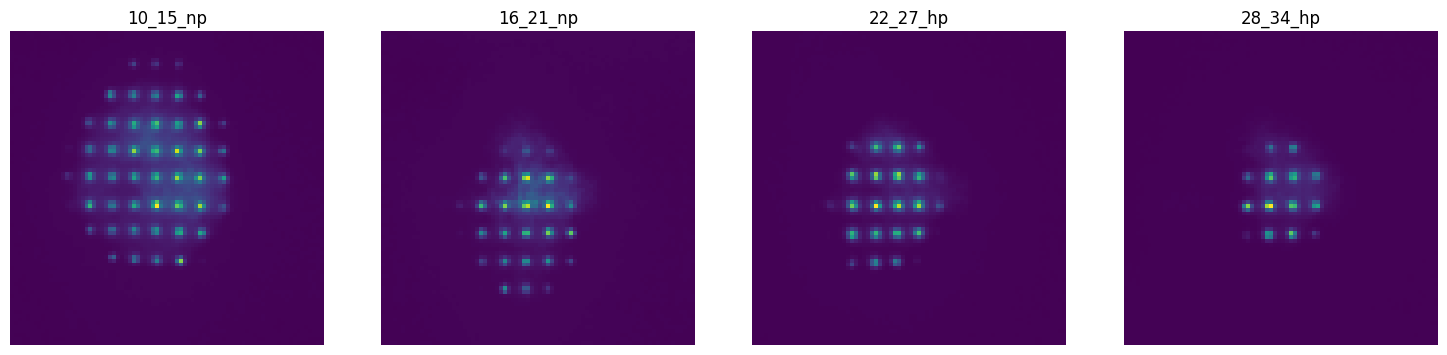

In [55]:
import matplotlib.pyplot as plt
# use np.unique to get all unique values in the list of labels
labels = np.unique(data['label'])
 
# set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)
fig.tight_layout()
 
# make a plot for every label (equipment) type. The index method returns the 
# index of the first item corresponding to its search string, label in this case
for ax, label in zip(axes, labels):
    idx = data['label'].index(label)
     
    ax.imshow(data['data'][idx])
    ax.axis('off')
    ax.set_title(label)

In [56]:
labels

array(['10_15_np', '16_21_np', '22_27_hp', '28_34_hp'], dtype='<U8')

### Train test splitting

In [124]:
X = np.array(data['data'])
y = np.array(data['label'])

In [125]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

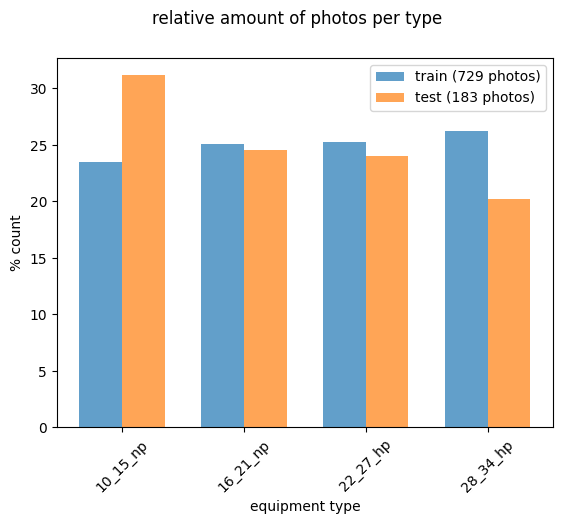

In [126]:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
     
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)
 
plt.suptitle('relative amount of photos per type')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)), 
    'test ({0} photos)'.format(len(y_test))
]);

### Normalization

In [127]:
x_train = X_train/255.0
x_test = X_test/255.0

In [128]:
x_train.shape

(729, 80, 80)

In [129]:
nsamples, nx, ny = x_train.shape
x_train2 = x_train.reshape((nsamples,nx*ny))

In [130]:
nsamples, nx, ny = x_test.shape
x_test2 = x_test.reshape((nsamples,nx*ny))

### Random forest classifier

In [131]:
from sklearn.ensemble import RandomForestClassifier

In [132]:
model=RandomForestClassifier()

In [133]:
model.fit(x_train2,y_train)

RandomForestClassifier()

In [134]:
y_pred=model.predict(x_test2)
y_pred

array(['10_15_np', '28_34_hp', '10_15_np', '16_21_np', '16_21_np',
       '28_34_hp', '16_21_np', '10_15_np', '16_21_np', '22_27_hp',
       '28_34_hp', '28_34_hp', '28_34_hp', '22_27_hp', '10_15_np',
       '22_27_hp', '10_15_np', '10_15_np', '10_15_np', '22_27_hp',
       '28_34_hp', '10_15_np', '10_15_np', '28_34_hp', '22_27_hp',
       '22_27_hp', '16_21_np', '28_34_hp', '16_21_np', '28_34_hp',
       '16_21_np', '28_34_hp', '10_15_np', '10_15_np', '28_34_hp',
       '16_21_np', '22_27_hp', '16_21_np', '10_15_np', '22_27_hp',
       '10_15_np', '10_15_np', '16_21_np', '10_15_np', '10_15_np',
       '16_21_np', '28_34_hp', '22_27_hp', '22_27_hp', '16_21_np',
       '16_21_np', '10_15_np', '22_27_hp', '10_15_np', '22_27_hp',
       '16_21_np', '28_34_hp', '16_21_np', '10_15_np', '10_15_np',
       '22_27_hp', '22_27_hp', '10_15_np', '28_34_hp', '28_34_hp',
       '28_34_hp', '16_21_np', '10_15_np', '16_21_np', '10_15_np',
       '22_27_hp', '16_21_np', '16_21_np', '28_34_hp', '10_15_

In [168]:
joblib.dump(model, "random_forest.joblib")

['random_forest.joblib']

### Evalution metrics

In [135]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [136]:
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    10_15_np       0.96      1.00      0.98        55
    16_21_np       1.00      0.96      0.98        47
    22_27_hp       0.95      1.00      0.98        42
    28_34_hp       1.00      0.95      0.97        39

    accuracy                           0.98       183
   macro avg       0.98      0.98      0.98       183
weighted avg       0.98      0.98      0.98       183



In [137]:
# confusion matrix
confusion_matrix(y_pred,y_test)

array([[55,  0,  0,  0],
       [ 2, 45,  0,  0],
       [ 0,  0, 42,  0],
       [ 0,  0,  2, 37]])

### Testing with custom image

In [169]:
loaded_rf = joblib.load("random_forest.joblib")

In [180]:
img_path = '/home/berlin/Desktop/gayathri/data/22_27_hp/109_OD_wavefront0 (copy).png'
im = imread(img_path)
im = resize(im, (80,80))/255

In [181]:
im.shape

(80, 80)

In [182]:
nx, ny = im.shape
img_arr2 = im.reshape(1,(nx*ny))

In [183]:
classes = ['10_15_np' '16_21_np' '22_27_hp' '28_34_hp'] # 28 > 16

In [190]:
ans=loaded_rf.predict(img_arr2)
ans[0]

'22_27_hp'